<a href="https://colab.research.google.com/github/preetamjumech/autoencoder_from_scratch/blob/main/Preetam_Saha_29_09_2022_Tom_and_Jerry_autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/deep learning practise/autoencoder"

In [ ]:
!kaggle datasets list -s "Tom and Jerry"

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
balabaskar/tom-and-jerry-image-classification                    Tom and Jerry Image classification                435MB  2022-05-23 12:45:08            500         69  1.0              
yashagrawal300/tom-and-jerry                                     Tom and Jerry                                      45MB  2020-03-19 08:42:44            228          6  0.5882353        
siddharthm1698/tom-and-jerry-cartoon-complete-frames-collection  Tom and Jerry Cartoon Complete Frames Collection  749MB  2021-08-03 13:38:37             99         19  0.875            
yassershrief/video-classification-tutorial                       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d "balabaskar/tom-and-jerry-image-classification"

100% 433M/435M [00:08<00:00, 43.4MB/s]
100% 435M/435M [00:08<00:00, 52.6MB/s]


In [ ]:
!unzip "/content/tom-and-jerry-image-classification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2793.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2794.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2795.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2796.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2797.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2798.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2799.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2800.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2801.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2802.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2803.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2804.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2805.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2806.jpg  
  inflating: tom_and_jerry/tom_and_jerry/jerry/frame2807.jpg  
  in

In [ ]:
import re, shutil,os

In [ ]:
#os.remove('/content/tom-and-jerry-image-classification.zip')

In [ ]:
#os.remove('/content/ground_truth.csv')

In [ ]:
#os.remove('/content/challenges.csv')

In [ ]:
#shutil.rmtree('/content/Val')

In [ ]:
#shutil.rmtree('/content/Train')

In [ ]:
#shutil.rmtree('/content/tom_and_jerry')

In [ ]:
os.makedirs('Train')
os.makedirs('Train/Tom')
os.makedirs('Train/Jerry')

In [ ]:
try:
    os.makedirs('Val')
    os.makedirs('Val/Tom')
    os.makedirs('Val/Jerry')
except:
    pass

In [ ]:
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
for i in os.listdir("/content/tom_and_jerry/tom_and_jerry/jerry")[20:40]:
  plt.figure()
  a=Image.open(f"/content/tom_and_jerry/tom_and_jerry/jerry/{i}")
  plt.imshow(a)

In [ ]:
os.listdir("/content/tom_and_jerry/tom_and_jerry/tom")

['frame2631.jpg',
 'frame2093.jpg',
 'frame427.jpg',
 'frame4916.jpg',
 'frame1675.jpg',
 'frame3458.jpg',
 'frame3377.jpg',
 'frame2299.jpg',
 'frame423.jpg',
 'frame1106.jpg',
 'frame2876.jpg',
 'frame4149.jpg',
 'frame1949.jpg',
 'frame1362.jpg',
 'frame552.jpg',
 'frame582.jpg',
 'frame2840.jpg',
 'frame4429.jpg',
 'frame4208.jpg',
 'frame2952.jpg',
 'frame3530.jpg',
 'frame413.jpg',
 'frame1848.jpg',
 'frame1744.jpg',
 'frame1714.jpg',
 'frame513.jpg',
 'frame2441.jpg',
 'frame1771.jpg',
 'frame3596.jpg',
 'frame1860.jpg',
 'frame4152.jpg',
 'frame4516.jpg',
 'frame3845.jpg',
 'frame3482.jpg',
 'frame969.jpg',
 'frame1013.jpg',
 'frame3316.jpg',
 'frame3664.jpg',
 'frame1149.jpg',
 'frame2496.jpg',
 'frame2586.jpg',
 'frame4694.jpg',
 'frame4904.jpg',
 'frame169.jpg',
 'frame1229.jpg',
 'frame417.jpg',
 'frame3484.jpg',
 'frame3341.jpg',
 'frame4793.jpg',
 'frame4373.jpg',
 'frame2781.jpg',
 'frame5070.jpg',
 'frame5288.jpg',
 'frame1455.jpg',
 'frame2606.jpg',
 'frame3318.jpg',
 

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
transf = transforms.Compose([transforms.PILToTensor(), 
                             transforms.Resize(size=(256,256)),
                             transforms.RandomHorizontalFlip(),
                             transforms.RandomVerticalFlip()])

In [ ]:
import re, shutil

In [ ]:
np.random.seed(0)
tom_index = np.array(range(len(os.listdir('/content/tom_and_jerry/tom_and_jerry/tom'))))
np.random.shuffle(tom_index)

In [ ]:
tom_index

array([ 957, 1126,  491, ..., 1653,  559,  684])

In [ ]:
len(tom_index) 

1930

In [ ]:
tom_index = np.array(os.listdir('/content/tom_and_jerry/tom_and_jerry/tom'))[tom_index]
tom_index

array(['frame2865.jpg', 'frame2616.jpg', 'frame3717.jpg', ...,
       'frame2609.jpg', 'frame4979.jpg', 'frame3814.jpg'], dtype='<U13')

In [ ]:
np.random.seed(0)
jerry_index = np.array(range(len(os.listdir('/content/tom_and_jerry/tom_and_jerry/jerry'))))
np.random.shuffle(jerry_index)

In [ ]:
jerry_index = np.array(os.listdir('/content/tom_and_jerry/tom_and_jerry/jerry'))[jerry_index]
jerry_index

array(['frame2233.jpg', 'frame4738.jpg', 'frame2194.jpg', ...,
       'frame1337.jpg', 'frame2942.jpg', 'frame738.jpg'], dtype='<U13')

In [ ]:
for file in tom_index:
  shutil.copy('/content/tom_and_jerry/tom_and_jerry/tom/'+file, '/content/Train/Tom/'+file)

In [ ]:
for file in jerry_index:
  shutil.copy('/content/tom_and_jerry/tom_and_jerry/jerry/'+file, '/content/Train/Jerry/'+file)

In [ ]:
r=ImageFolder(root='/content/Train', transform=transf)

In [ ]:
data = DataLoader(ImageFolder(root='/content/Train', transform=transf), 
                          batch_size=32, shuffle=True)

In [ ]:
data 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam

In [ ]:
j=1
for i in data:
  print(j)
  j+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:
j=1
for i in data:
  print(i[0].shape,i[1].shape)
  print(i[0].numpy())

Streaming output truncated to the last 5000 lines.
   [  0   0   0 ...   0   0   0]]

  [[  0   0   0 ...   0   0   0]
   [  0   0   0 ...   0   0   0]
   [  0   0   0 ...   0   0   0]
   ...
   [  0   0   0 ...   0   0   0]
   [  0   0   0 ...   0   0   0]
   [  0   0   0 ...   0   0   0]]]


 ...


 [[[ 42  56  56 ...  36  37  37]
   [ 44  56  56 ...  36  37  37]
   [ 44  55  57 ...  36  37  37]
   ...
   [ 95  65  46 ... 123 120 120]
   [ 76  52  42 ... 123 120 120]
   [ 66  42  41 ... 123 120 120]]

  [[ 54  68  68 ...  40  39  39]
   [ 56  68  68 ...  40  39  39]
   [ 56  67  69 ...  40  39  39]
   ...
   [104 115 122 ... 113 112 112]
   [107 119 125 ... 113 112 112]
   [113 122 125 ... 113 112 112]]

  [[ 18  32  32 ...  25  26  26]
   [ 20  32  32 ...  25  26  26]
   [ 20  30  32 ...  25  26  26]
   ...
   [ 60  60  63 ...  64  65  65]
   [ 57  60  63 ...  64  65  65]
   [ 59  59  65 ...  64  65  65]]]


 [[[  0   0   0 ...   0   0   0]
   [  0   0   0 ...   0   0   0]
   [  0  

In [ ]:
X1=np.zeros(1)

In [ ]:
X1

array([0.])

In [ ]:
X2=list()
Y2=list()

In [ ]:
for i in data:
  for j in i[0]:
    X2.append(j.numpy())
  for z in i[1]:
    Y2.append(z.numpy())


In [ ]:
len(X2)

3170

In [ ]:
len(Y2)

3170

In [ ]:
np.array(X2).shape

(3170, 3, 256, 256)

In [ ]:
np.array(X2)[0].shape

(3, 256, 256)

In [ ]:
x=torch.tensor(np.array(X2))
y=torch.tensor(np.array(Y2))

In [ ]:
x.shape

torch.Size([3170, 3, 256, 256])

In [ ]:
x.shape

torch.Size([3170, 3, 256, 256])

In [ ]:
x=x/255

In [ ]:
x_train=x[:2500]
x_test=x[2501:]
y_train=y[:2500]
y_test=y[2501:]

In [ ]:
x_train.shape

torch.Size([2500, 3, 256, 256])

In [ ]:
x_train=x_train.reshape(-1,3*256*256)
x_test=x_test.reshape(-1,3*256*256)

In [ ]:
encoder=nn.Sequential(nn.Linear(in_features=3*256*256,out_features=256),nn.ReLU(),
                      nn.Linear(in_features=256,out_features=128),nn.ReLU(),
                      nn.Linear(in_features=128,out_features=64),nn.ReLU(),
                      nn.Linear(in_features=64,out_features=16))

In [ ]:
decoder=nn.Sequential(nn.Linear(in_features=16,out_features=64),nn.ReLU(),
                      nn.Linear(in_features=64,out_features=128),nn.ReLU(),
                      nn.Linear(in_features=128,out_features=256),nn.ReLU(),
                      nn.Linear(in_features=256,out_features=3*256*256))

In [ ]:
autoencoder=nn.Sequential(encoder,decoder)

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 
from torch.optim import Adam 
from torch.utils.data import DataLoader,TensorDataset 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd  

In [ ]:
train_loader=DataLoader(TensorDataset(x_train.float(),y_train),batch_size=64,shuffle=True)
val_loader=DataLoader(TensorDataset(x_test.float(),y_test),batch_size=64)

In [ ]:
device=torch.device('cuda') if torch.cuda.is_available() else 'cpu'
device 

'cpu'

In [ ]:

autoencoder=autoencoder.to(device) 
opt=Adam(autoencoder.parameters())

In [ ]:
epochs=10

In [ ]:
def train1(model,train_loader,val_loader,opt,epoch):
  training_loss=0.0
  val_loss=0.0
 #training
  for batch,_ in train_loader:
    batch=batch.to(device)
    target=batch.to(device)

    opt.zero_grad()
    train_output=model(batch)
    train_loss=F.mse_loss(train_output,target)
    train_loss.backward()
    opt.step()
    training_loss+=train_loss.item()
  
  if(epoch+1)%10==0:
    print(f"Train_loss: {training_loss}")
  
#validation
  with torch.no_grad():
    for val_batch,_ in val_loader:
      val_batch=val_batch.to(device)
      val_target=val_batch.to(device)
      
      val_output=model(val_batch)
      loss_val=F.mse_loss(val_output,val_target)
      val_loss+=loss_val.item()

  if(epoch+1)%10==0:
    print(f"Train_loss: {training_loss} and Val_loss: {val_loss}")
  
  return (training_loss,val_loss) 

In [ ]:
losses=[]
for epoch in range(2):
  losses.append(train1(model=autoencoder,train_loader=train_loader,
                      val_loader=val_loader,opt=opt,epoch=epoch))#epoch is only for printing the losses 

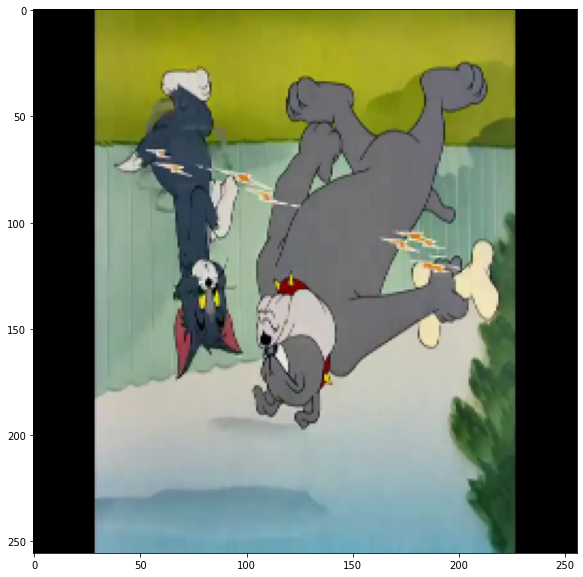

In [ ]:
idx=20
img_arbit=x_test[idx]
plt.imshow(img_arbit.numpy().reshape(3,256,256).transpose(1,2,0))

In [ ]:
img_arbit.numpy().reshape(3,256,256).transpose(1,2,0)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
input_data=img_arbit.reshape(1,-1).float().to(device)

In [ ]:
output_encoder=encoder(input_data)
output_encoder

tensor([[ -1.2107,   3.4740,   1.4263,  -8.6977,  -1.3758, -11.6132,   9.7743,
          -9.6275,   6.9666,  -4.9323,   7.8574,  12.2301,  -0.0832,   4.5577,
          10.0989,   2.1534]], grad_fn=<AddmmBackward0>)

In [ ]:
output_decoder=decoder(output_encoder).detach().cpu().numpy().reshape(3,256,256).transpose(1,2,0)

In [ ]:
output_decoder.shape

(256, 256, 3)

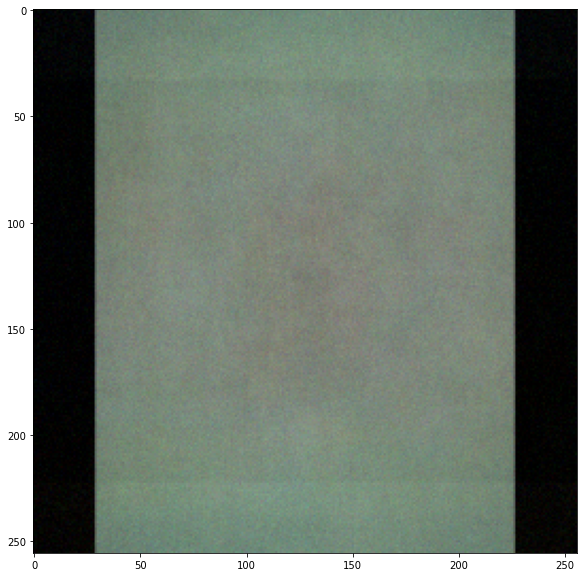

In [ ]:
plt.imshow(output_decoder)